In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns

In [86]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [87]:
print("train shape: ", train.shape)
print("test.shape ",test.shape  )

train shape:  (1460, 81)
test.shape  (1459, 80)


In [88]:
df=train.copy()
test=test.copy()

In [89]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [90]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [91]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [92]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


Skew is 1.8828757597682129


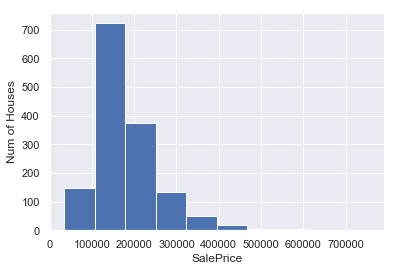

In [93]:
print("Skew is", train.SalePrice.skew())
sns.set()
plt.hist(train.SalePrice)
plt.xlabel('SalePrice')
plt.ylabel('Num of Houses')
plt.show()

In [94]:
train["SalePrice"].isna().sum()

0

In [95]:
train["SalePrice"][0:10]


0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

Skew is:  0.12133506220520406


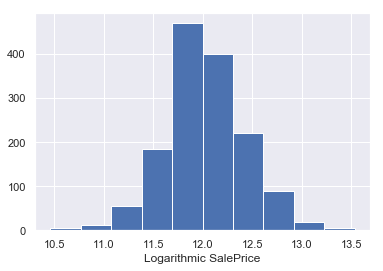

In [96]:
target=np.log(train.SalePrice)
print("Skew is: ",target.skew())
plt.hist(target)
plt.xlabel('Logarithmic SalePrice')
plt.show()

In [97]:
numeric_features=train.select_dtypes(include=[np.number])
corr=numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:5])
print()
print(corr['SalePrice'].sort_values(ascending=False)[-5:])
numeric_features.shape


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


(1460, 38)

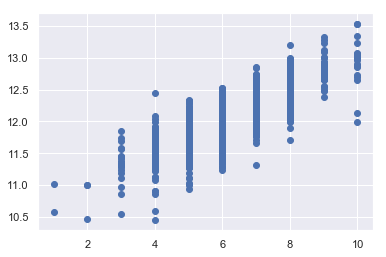

In [98]:
plt.scatter(x=train["OverallQual"],y=target)

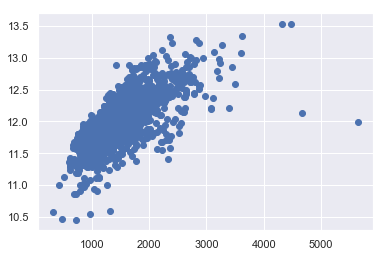

In [99]:
plt.scatter(x=train["GrLivArea"],y=target)

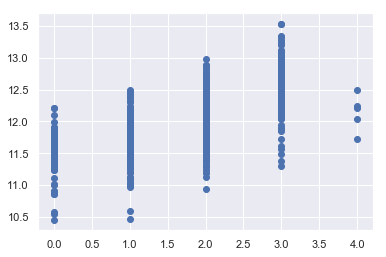

In [100]:
plt.scatter(x=train["GarageCars"],y=target)

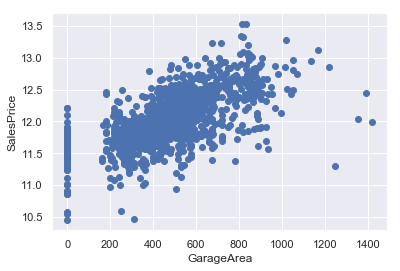

In [101]:
plt.scatter(x=train["GarageArea"],y=target)
plt.xlabel('GarageArea')
plt.ylabel('SalesPrice')
plt.show()

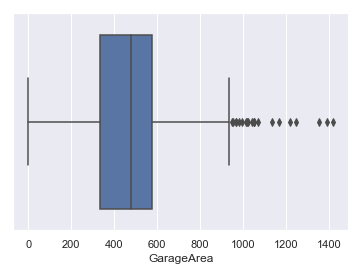

In [102]:
sns.boxplot(x=train["GarageArea"]);

In [103]:
Q1= train["GarageArea"].quantile(0.25)
Q3= train["GarageArea"].quantile(0.75)
IQR=Q3-Q1

Lower_boundary= Q1 - 1.5*IQR
Higher_boundary=Q3+ 1.5*IQR
print("Lower boundary= ",Lower_boundary)
print("Higher_boundary= ",Higher_boundary )


Lower boundary=  -27.75
Higher_boundary=  938.25


**Boundary looks meaningless regarding the scatter plot. We determine a higher boundary of 1100 according to our observation on the scatter plot of Garage Area.**

In [112]:
train=train[train["GarageArea"]<1200]

train.shape


(1455, 81)

In [105]:
train["GarageArea"].max()

1166

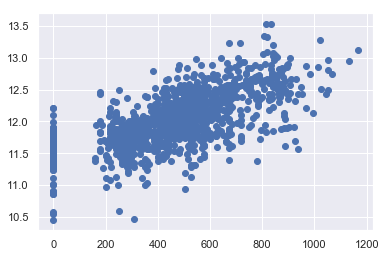

In [106]:
plt.scatter(x=train["GarageArea"],y=np.log(train["SalePrice"]))

In [107]:
nulls=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])

In [108]:
nulls.columns=["Null Count"]
nulls.index.name="Feature"
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


**Wrangling Non-Numeric Features**

In [111]:
train.shape

(1455, 81)

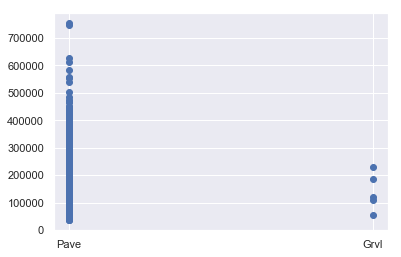

In [114]:
plt.scatter(x=categoricals["Street"],y=train["SalePrice"])

In [113]:
categoricals=train.select_dtypes(exclude=[np.number])
print(categoricals.describe())
print(categoricals.shape)

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1455         1455       1455      ...            1374   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1378          225       1257      ...             867   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1374       1374       1374       1455      6    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Ex  MnPrv   
freq    

In [61]:
train["enc_street"]=pd.get_dummies(train.Street,drop_first=True)
test["enc_street"]=pd.get_dummies(test.Street,drop_first=True)
train.enc_street.value_counts()

1    1448
0       5
Name: enc_street, dtype: int64

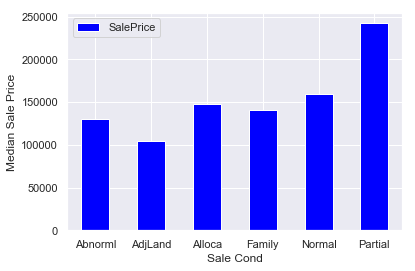

In [124]:
condition_pivot= train.pivot_table(index="SaleCondition",
                                   values = "SalePrice",aggfunc=np.median)
print (condition_pivot)
condition_pivot.plot(kind="bar", color="blue")
plt.xlabel("Sale Cond")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=0)
plt.show()



In [125]:
def pivit(feature):
    condition_pivot= train.pivot_table(index=feature,
                                   values = "SalePrice",aggfunc=np.median)
   
    condition_pivot.plot(kind="bar", color="blue")
    plt.xlabel(feature)
    plt.ylabel("Median Sale Price")
    plt.xticks(rotation=0)
    plt.show()


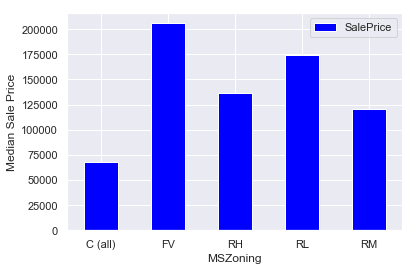

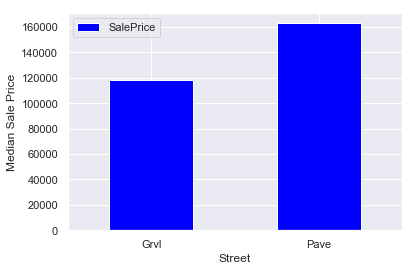

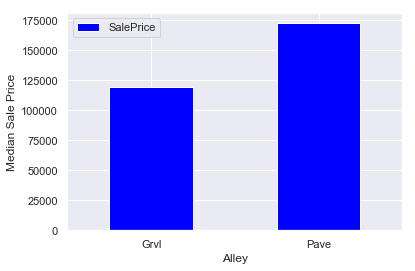

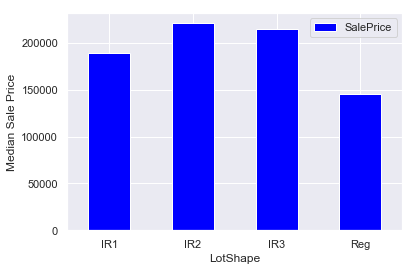

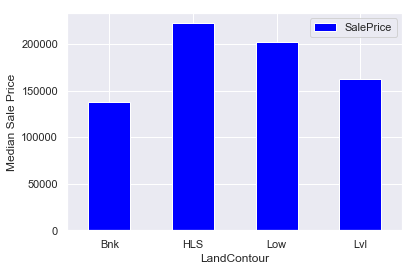

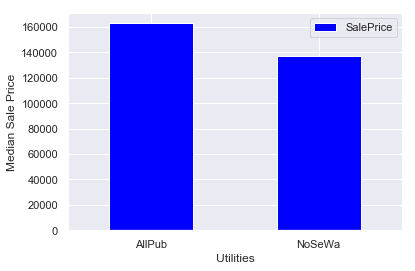

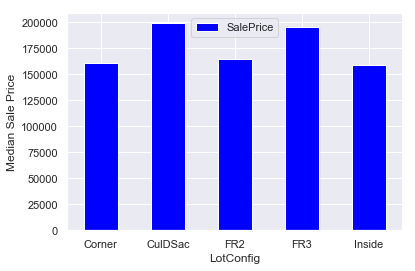

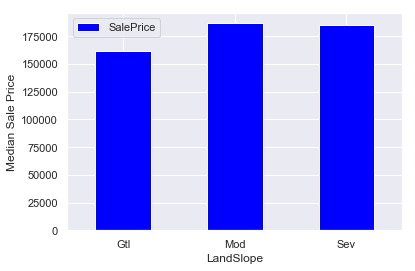

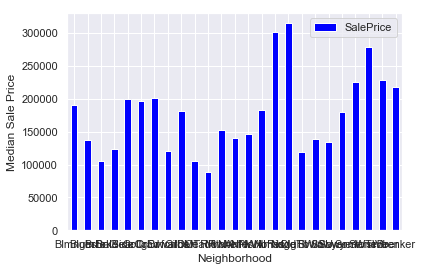

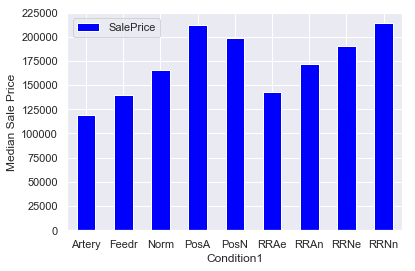

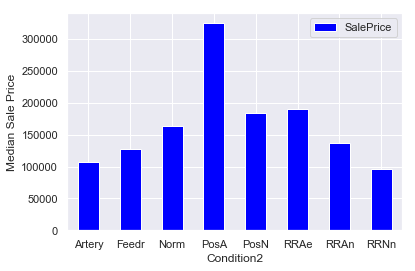

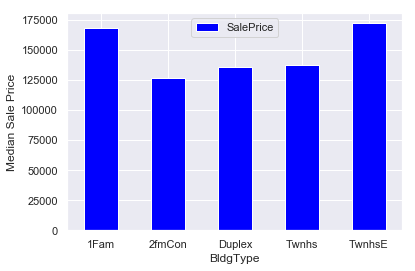

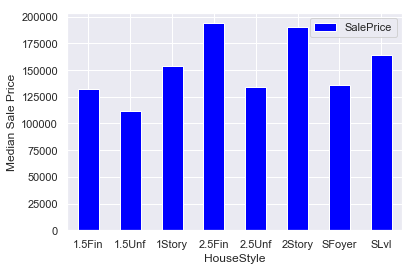

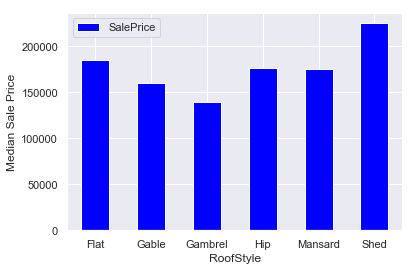

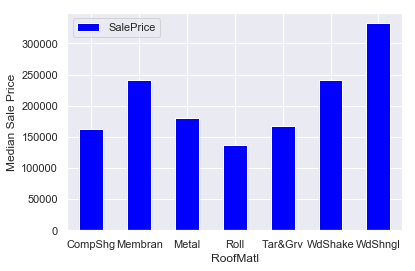

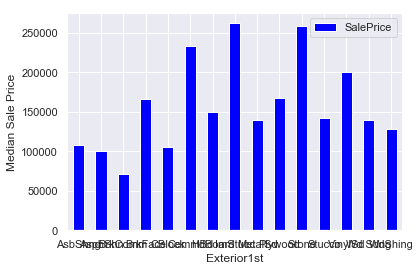

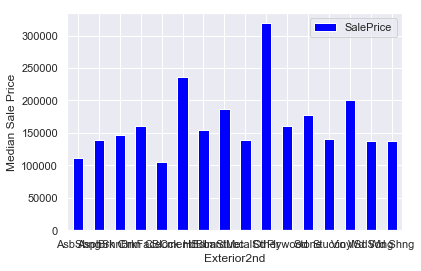

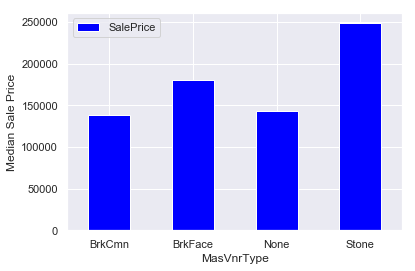

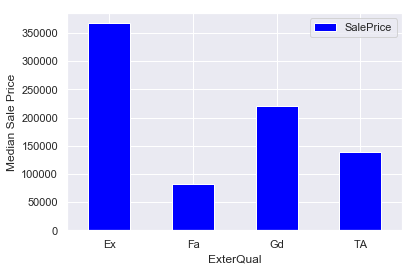

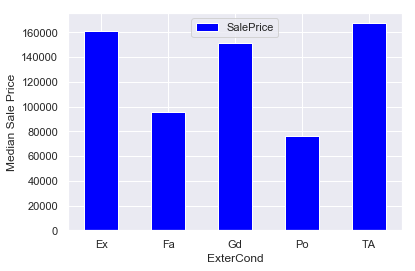

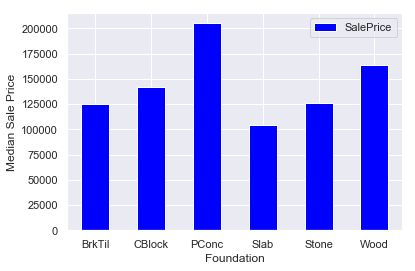

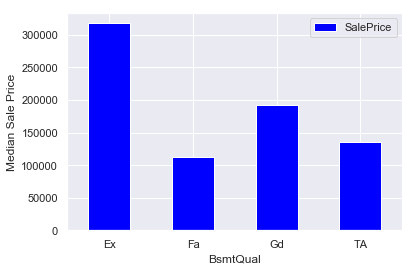

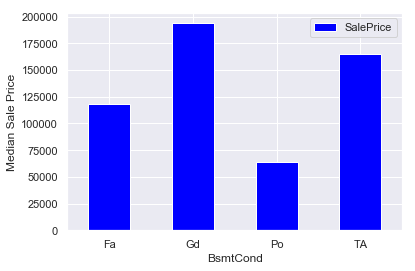

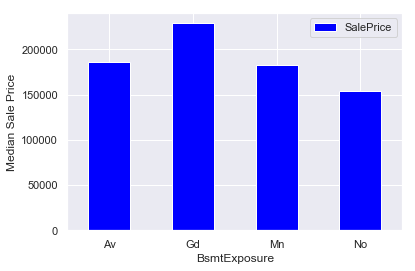

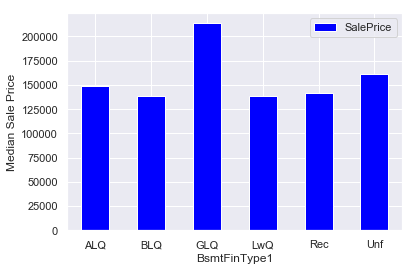

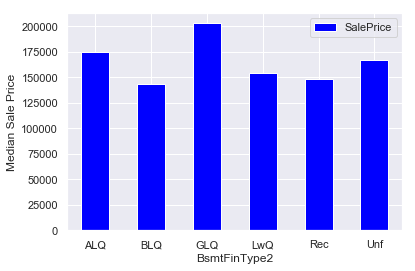

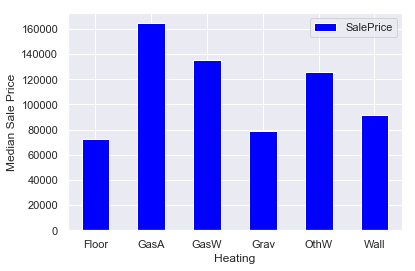

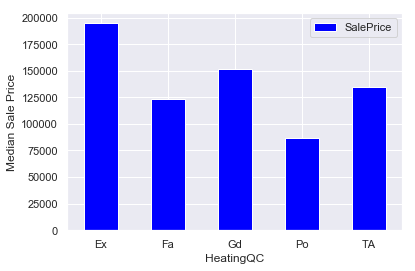

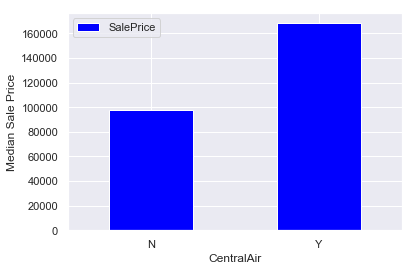

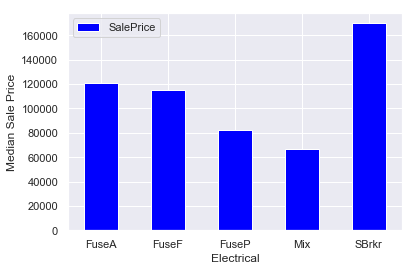

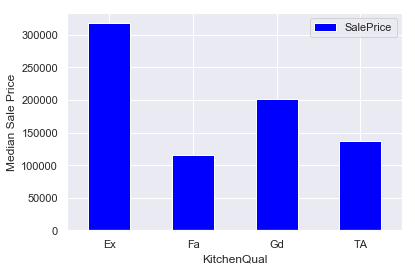

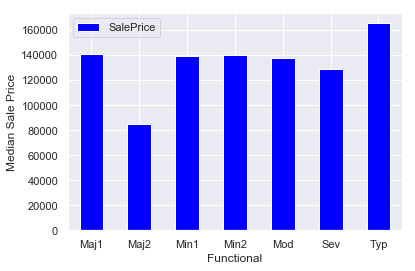

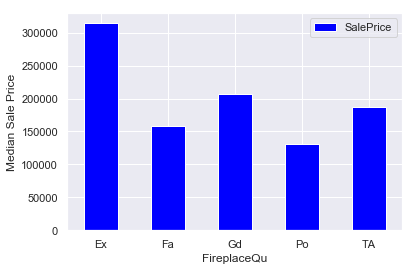

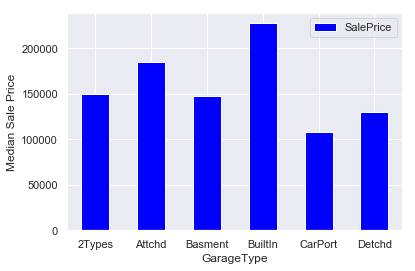

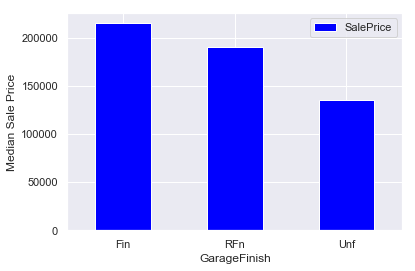

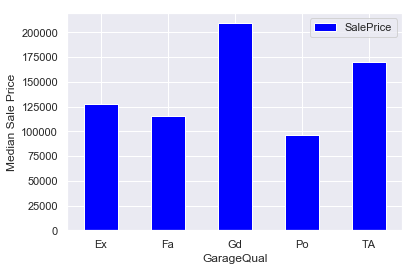

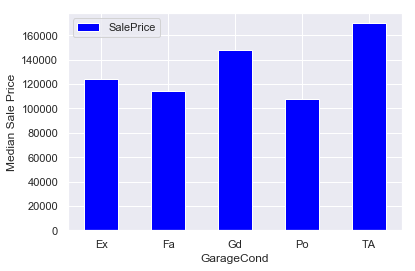

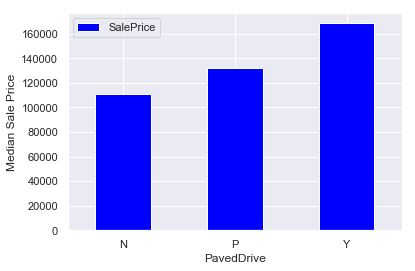

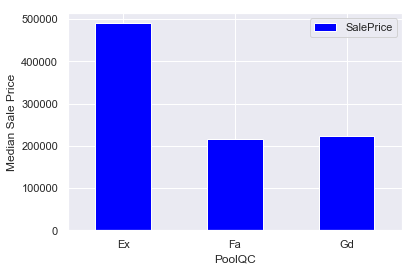

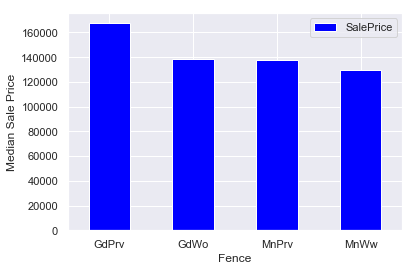

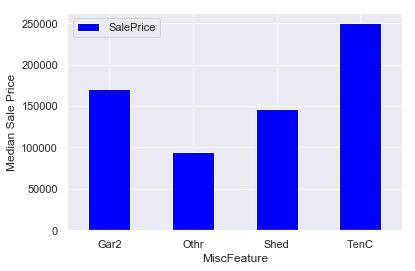

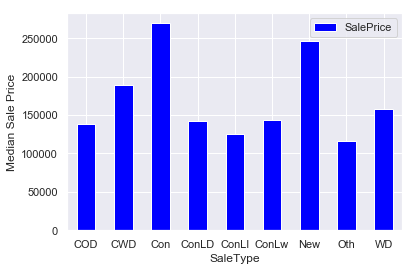

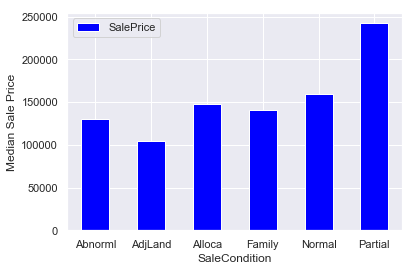

In [126]:
for feature in categoricals.columns.values:
    pivit(feature)

In [63]:
def encode(x): return 1 if x=="Partial" else 0
train["enc_condition"]=train.SaleCondition.apply(encode)
test["enc_condition"]=test.SaleCondition.apply(encode)

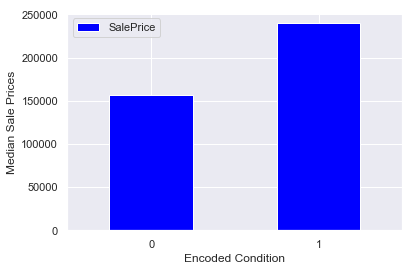

In [64]:
condition_pivot=train.pivot_table(index="enc_condition", 
                                  values="SalePrice",aggfunc=np.median)
condition_pivot.plot(kind="bar", color="blue")

plt.xlabel("Encoded Condition")
plt.ylabel("Median Sale Prices")
plt.xticks(rotation=0)

plt.show()

In [65]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       258
LotArea             0
Street              0
Alley            1362
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       689
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchS

In [66]:
train[train.PoolQC.notnull()].PoolQC

197     Ex
810     Fa
1170    Gd
1182    Ex
1386    Fa
1423    Gd
Name: PoolQC, dtype: object

In [127]:
data= train.select_dtypes(include=[np.number]).interpolate().dropna()
print(sum(data.isnull().sum()))

0


In [68]:
data.shape

(1453, 40)

In [69]:
train.shape

(1453, 83)

In [70]:
numeric_features.shape

(1460, 38)

In [71]:
y=np.log(train.SalePrice)
X=data.drop(["SalePrice","Id"], axis=1)

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42, test_size=.33)

In [73]:
X_train.shape

(973, 38)

In [74]:
X_test.shape

(480, 38)

**Linear Regression Model**

In [75]:
lr= linear_model.LinearRegression()

In [76]:
model=lr.fit(X_train,y_train)

In [77]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
print("R^2 is: ", model.score(X_test,y_test))

R^2 is:  0.8540960549266245


**RMSE**

In [79]:
predictions=model.predict(X_test)

In [80]:
print("RMSE is: ",mean_squared_error(y_test,predictions))

RMSE is:  0.02508799794452993


In [81]:
actual_values=y_test

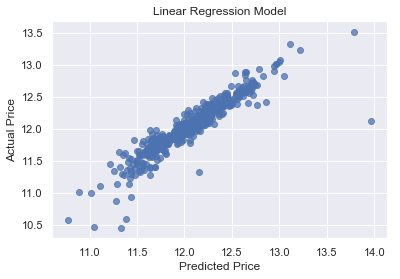

In [82]:
plt.scatter(predictions,actual_values, alpha=.75, color="b", )
plt.ylabel('Actual Price')
plt.xlabel('Predicted Price')
plt.title("Linear Regression Model")
plt.show()

In [83]:
submission= pd.DataFrame()
submission["Id"]=test.Id

In [84]:
test.shape

(1459, 82)

In [85]:
feats= test.select_dtypes(include=[np.number]).drop(["Id"],axis=1).interpolate()

In [86]:
predictions=model.predict(feats)

In [87]:
final_predictions= np.exp(predictions)

In [88]:
print("Original Prediction: ", predictions)
print("Final Predictions", final_predictions)

Original Prediction:  [11.7172359  11.91386715 12.06930992 ... 12.15783751 11.63275458
 12.37002867]
Final Predictions [122667.89013793 149323.01821666 174435.42995176 ... 190581.93865138
 112730.41956303 235632.50177741]


In [89]:
submission["SalePrice"]=final_predictions

In [3]:
submission.head(10)

NameError: name 'submission' is not defined